# Intro to linear/circular motion

In [4]:
import numpy as np
theta_1 = 10 * np.pi/180.0 #converting to radians
theta_1

0.17453292519943295

In [5]:
theta_2 = 10 * np.pi/180.0 + 2.0*5
theta_2

10.174532925199433

In [7]:
theta_3 = theta_2 - 0.5*10
theta_3

5.174532925199433

In [9]:
theta_4 = theta_3 + 5 *0.5
theta_4

7.674532925199433

In [10]:
theta_5 = theta_4 + 1*3
theta_5

10.674532925199433

In [20]:
def final_angle(theta_0, list_of_omegas, list_of_delta_times):
    for i in range(0, len(list_of_omegas)):
        theta_i = theta_0 + list_of_omegas[i]*list_of_delta_times[i] # you can use debug tool to see how it works (in teacher's notebook)
        theta_0 = theta_i
    print('Final angle is ' + str(theta_i*180/np.pi) + 'degrees') #radians to degrees
    print(' or in radians = ' + str(theta_i))

In [21]:
theta_0 = 10 * np.pi/180   #degrees to radians
list_of_omegas = [2, -0.5, 5, 1]
list_of_delta_times = [5, 10, 0.5, 3]

In [22]:
final_angle(theta_0, list_of_omegas, list_of_delta_times)

Final angle is 611.6056848873643degrees
 or in radians = 10.674532925199433


# Gravity and Circular Motion - Measuring Gravity

In [24]:
%matplotlib notebook

In [25]:
import matplotlib.pyplot as plt

In [26]:
import imageio

In [28]:
!pip install imageio-ffmpeg

    100% |████████████████████████████████| 20.7MB 47kB/s eta 0:00:01
You are using pip version 9.0.1, however version 19.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


NeedDownloadError: Need ffmpeg exe. You can obtain it with either:
  - install using conda: conda install ffmpeg -c conda-forge
  - download by calling: imageio.plugins.ffmpeg.download()

In [43]:
!conda install ffmpeg -c conda-forge --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /Users/nityasriadapala/anaconda3:

The following NEW packages will be INSTALLED:

    conda-package-handling: 1.3.11-py36_0             conda-forge
    ffmpeg:                 4.1.3-h5c2b479_0          conda-forge
    gnutls:                 3.6.5-h53004b3_1002       conda-forge
    lame:                   3.100-h1de35cc_1001       conda-forge
    libarchive:             3.3.3-h786848e_5                     
    lz4:                    2.1.9-py36h9608888_0      conda-forge
    lz4-c:                  1.8.3-h6de7cb9_1001       conda-forge
    nettle:                 3.4.1-h3efe00b_1002       conda-forge
    openh264:               1.8.0-hd9629dc_1000       conda-forge
    python-libarchive-c:    2.8-py36_1004             conda-forge
    tqdm:                   4.32.2-py_0               conda-forge
    x264:                   1!152.20180806-h1de35cc_0 conda-forge
    zs

In [50]:
reader = imageio.get_reader('https://d3tsb3m56iwvoq.cloudfront.net/transcoded/techtv/a054739f22d04659b13f05e44879952a/hd.mp4')
fps = reader.get_meta_data()['fps']
fps

29.97

In [51]:
image = reader.get_data(1100)
image.shape

(1080, 1440, 3)

In [52]:
plt.imshow(image)

<IPython.core.display.Javascript object>


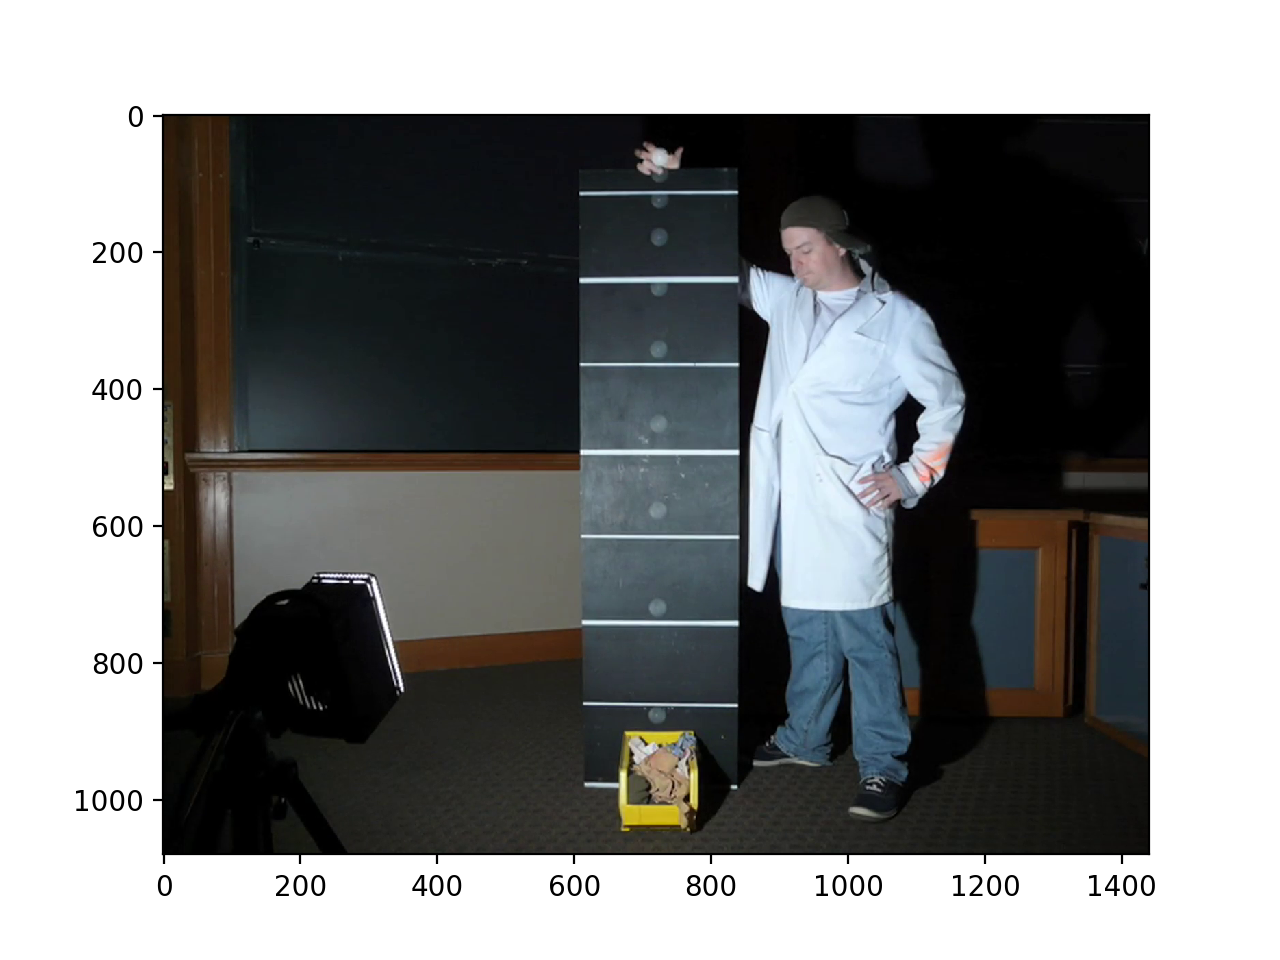

In [53]:
fig = plt.figure()

plt.imshow(image)

coords = []

# a weird function associated with interactivity
def onclick(event):
    x = event.xdata # grab click x
    y = event.ydata # grab click y
    coords.append([x,y]) # store x&y values
    
# one more weird call
connectId = fig.canvas.mpl_connect('button_press_event', onclick)

In [54]:
fig.canvas.mpl_disconnect(connectId)

In [55]:
coords

[[815.88291396103887, 118.09983766233745],
 [804.19460227272725, 243.74918831168816],
 [804.19460227272725, 369.39853896103887],
 [798.35044642857133, 495.04788961038946],
 [801.27252435064929, 620.69724025974017],
 [810.03875811688317, 743.4245129870128],
 [810.03875811688317, 866.15178571428555]]

In [56]:
y_lines = np.array(coords)[:,1]
y_lines

array([ 118.09983766,  243.74918831,  369.39853896,  495.04788961,
        620.69724026,  743.42451299,  866.15178571])

In [57]:
dy = np.roll(y_lines,-1) - y_lines
dy

array([ 125.64935065,  125.64935065,  125.64935065,  125.64935065,
        122.72727273,  122.72727273, -748.05194805])

In [58]:
pixels_to_meters = 0.25/dy[:-1].mean()
pixels_to_meters

0.0020052083333333332

In [59]:
dy[:-1]

array([ 125.64935065,  125.64935065,  125.64935065,  125.64935065,
        122.72727273,  122.72727273])

<IPython.core.display.Javascript object>


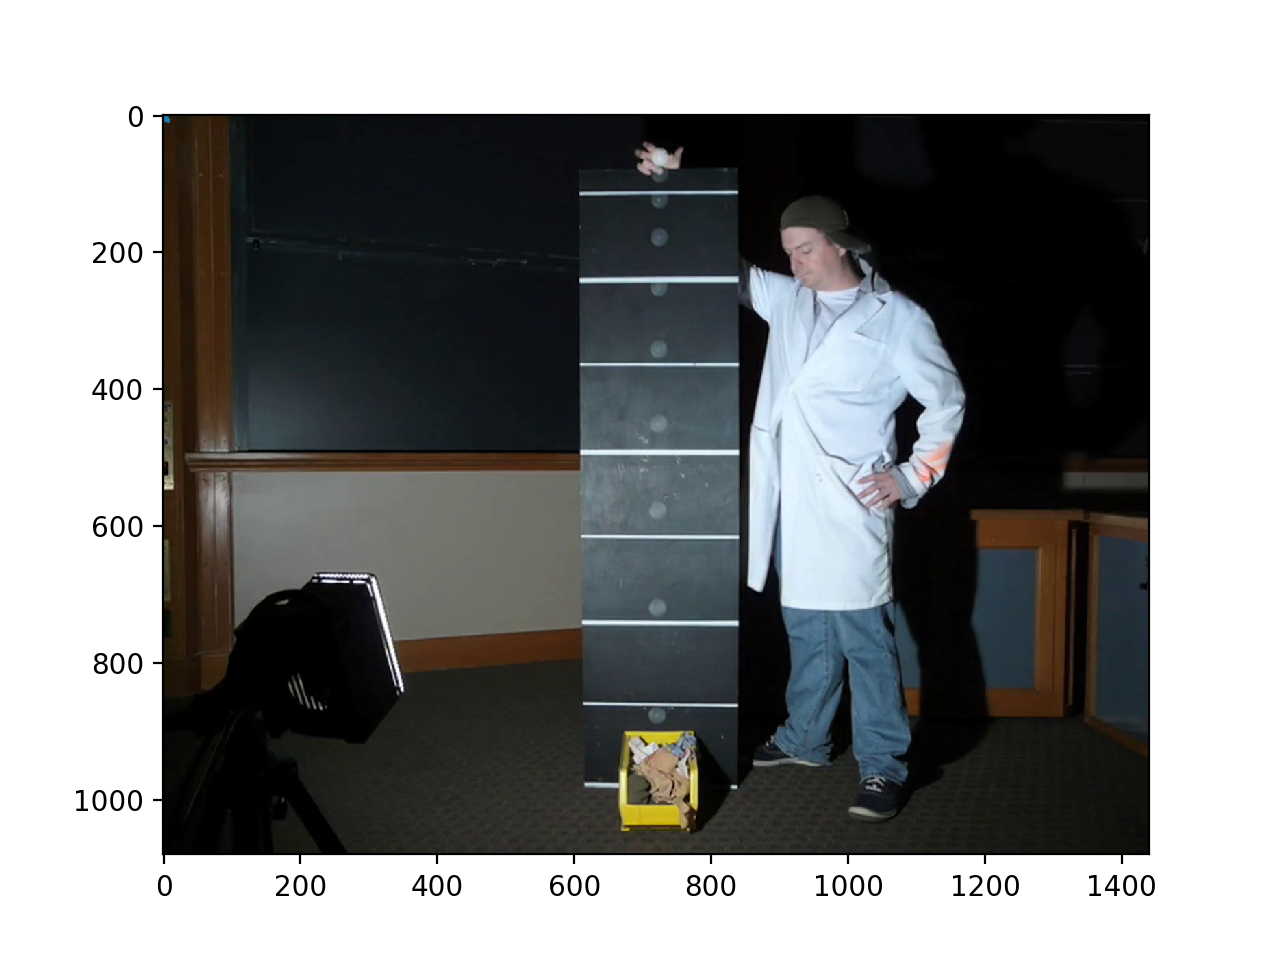

In [60]:

#figure object
fig = plt.figure()

plt.imshow(image)

ball_coords = []

# a weird function associated with interactivity
def onclick(event):
    x = event.xdata # grab click x
    y = event.ydata # grab click y
    ball_coords.append([x,y]) # store x&y values
    
# one more weird call
connectId = fig.canvas.mpl_connect('button_press_event', onclick)

In [63]:
fig.canvas.mpl_disconnect(connectId)

In [64]:
ball_coords

[[725.29849837662334, 96.366883116882946],
 [722.37642045454538, 128.50974025974006],
 [722.37642045454538, 181.10714285714266],
 [725.29849837662334, 257.08116883116872],
 [722.37642045454538, 344.7435064935064],
 [722.37642045454538, 455.78246753246742],
 [725.29849837662334, 581.43181818181802],
 [725.29849837662334, 721.6915584415583],
 [722.37642045454538, 879.48376623376612]]

In [65]:
y_ball = np.array(ball_coords)[:,1]

In [66]:
y_ball

array([  96.36688312,  128.50974026,  181.10714286,  257.08116883,
        344.74350649,  455.78246753,  581.43181818,  721.69155844,
        879.48376623])

In [67]:
dy_ball = (np.roll(y_ball,-1) - y_ball)*pixels_to_meters
dy_ball[:-1]

array([ 0.06445312,  0.10546875,  0.15234375,  0.17578125,  0.22265625,
        0.25195312,  0.28125   ,  0.31640625])

In [68]:
dt = 1./16.8

In [69]:
velocity = dy_ball[:-1]/dt
velocity

array([ 1.0828125,  1.771875 ,  2.559375 ,  2.953125 ,  3.740625 ,
        4.2328125,  4.725    ,  5.315625 ])

In [70]:
dvball = np.roll(velocity,-1) - velocity
dvball

array([ 0.6890625,  0.7875   ,  0.39375  ,  0.7875   ,  0.4921875,
        0.4921875,  0.590625 , -4.2328125])

In [71]:
acceleration = dvball[:-1]/dt
acceleration

array([ 11.57625,  13.23   ,   6.615  ,  13.23   ,   8.26875,   8.26875,
         9.9225 ])

In [72]:
acceleration.mean()

10.158750000000008

# Ellipses

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
theta = np.arange(0, 2*np.pi, 0.001)

In [109]:
theta, theta.shape

(array([  0.00000000e+00,   1.00000000e-03,   2.00000000e-03, ...,
          6.28100000e+00,   6.28200000e+00,   6.28300000e+00]), (6284,))

In [110]:
theta, theta.shape

(array([  0.00000000e+00,   1.00000000e-03,   2.00000000e-03, ...,
          6.28100000e+00,   6.28200000e+00,   6.28300000e+00]), (6284,))

In [111]:
#specifying eccentricity and semi major axis

In [112]:
a = 5
ecc = 0.5

In [113]:
r = (a*(1-ecc**2))/(1-ecc*np.cos(theta))
r

array([ 7.5       ,  7.49999625,  7.499985  , ...,  7.49998209,
        7.49999473,  7.49999987])

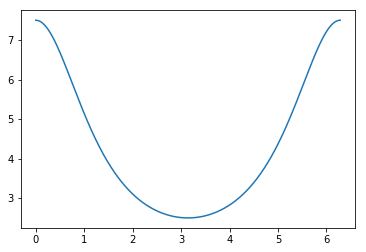

In [114]:
plt.plot(theta, r)
plt.show()

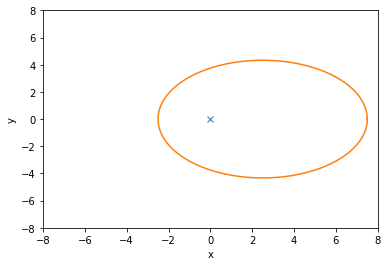

In [116]:
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(0,0, 'x')

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y)
plt.show()

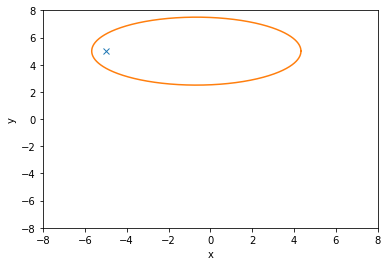

In [129]:
a = 5
b = 2.5
ecc = np.sqrt(1-(b**2)/(a**2))
r = (a*(1-ecc**2))/(1-ecc*np.cos(theta))

x = r*np.cos(theta) + -5
y = r*np.sin(theta) + 5

plt.plot(-5,5, 'x')

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y)
plt.show()

In [130]:
area = np.pi*a*b  #area of an ellipse = pi*a*b

In [131]:
area

39.269908169872416